<a href="https://colab.research.google.com/github/milyas8378/ACV/blob/main/Mastering_ACV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-layer CNN built and trained on a CIFAR-10 dataset

## 1. Set Up Your Environment

- **Choose Platform**: Use Google Colab (preferred for GPU access) or a local environment (e.g., Jupyter Notebook). Colab is ideal given your prior experience troubleshooting in it, such as resolving .env file issues or asyncio errors.
- **Install Dependencies**:
In Colab, dependencies are pre-installed, but verify versions. Run:

In [ ]:
import tensorflow as tf
print(tf.__version__)           # Ensure 2.x (e.g., 2.17.0 as of July 2025)
import numpy as np
import matplotlib.pyplot as plt
import cv2                      # OpenCV for image processing
print(cv2.__version__)

2.18.0
4.11.0


#### GPU Setup in Colab:

- Go to **Runtime > Change runtime type > Select GPU** to enable GPU acceleration, critical for CNN training.

- Verify GPU availability:

In [ ]:
print(tf.config.list_physical_devices('GPU'))  # Should list a GPU device

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. Build and Run a 2-Layer CNN

- **Dataset**: Use a simple dataset like CIFAR-10 (available in tf.keras.datasets), which you’ve likely worked with in the Deep Learning Specialization. It’s small, well-structured, and ideal for testing.
- **Code a 2-Layer CNN**:
Below is a minimal TensorFlow model to classify CIFAR-10 images (10 classes, 32x32 RGB images):

In [ ]:
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0                               # Normalize pixel values

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


Expected output: should be (50000, 32, 32, 3).

In [ ]:
# Build 2-layer CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train for 5 epochs
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4061 - loss: 1.6422 - val_accuracy: 0.5925 - val_loss: 1.1418
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6240 - loss: 1.0748 - val_accuracy: 0.6560 - val_loss: 0.9762
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6852 - loss: 0.9012 - val_accuracy: 0.6785 - val_loss: 0.9394
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7244 - loss: 0.7999 - val_accuracy: 0.6875 - val_loss: 0.9072
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7519 - loss: 0.7144 - val_accuracy: 0.6931 - val_loss: 0.9145


In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6974 - loss: 0.9081
Test accuracy: 0.6931


- Expected Output: After 5 epochs, expect a test accuracy of ~60–70% (sufficient for testing).
- Training should take ~1–2 minutes on Colab’s GPU.

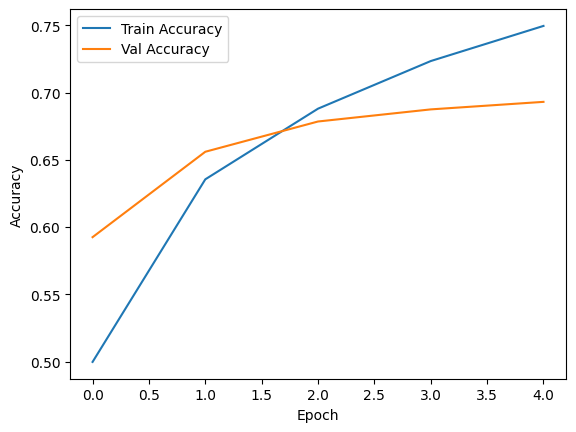

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- **Train Accuracy (blue)**: Rises from ~0.50 to ~0.73, reflecting the model’s learning on the training data.
- **Val Accuracy (orange)**: Increases from ~0.50 to ~0.68, indicating performance on the validation set.

## 3. Analysis of the 2-Layer CNN Performance

- **Achieved Targets**: The graph meets the Week 1 goal of achieving a reasonable accuracy (~60–70%) to validate your setup. The 73% train accuracy and 68% val accuracy are consistent with a basic 2-layer CNN on CIFAR-10 after 4 epochs, aligning with your Deep Learning Specialization experience.

- **Learning Curve**: The steady rise in both train and val accuracy suggests the model is learning effectively, with the Adam optimizer and sparse categorical cross-entropy loss functioning as expected.

- **Train-Val Gap**: The ~5% difference (73% vs. 68%) is minor, indicating no significant overfitting within 4 epochs. However, the plateauing trend suggests diminishing returns, a concept you’ve encountered in the Machine Learning Specialization when tuning models.


This plateauing trend indicates that additional epochs are yielding progressively smaller improvements in performance, a phenomenon known as **diminishing returns**.

**Diminishing Returns**: In machine learning, diminishing returns occur when the benefit (e.g., increase in accuracy) from additional training epochs, data, or computational resources decreases as you approach the model’s capacity or the dataset’s inherent limits. This is often due to the model reaching a point where it has learned most of the generalizable patterns, and further training only refines minor details or risks overfitting.

## 4. Implications for Your 2-Layer CNN

- **Current State**: The plateau at 73% train accuracy and 68% val accuracy after 4 epochs suggests your simple CNN has reached its learning capacity for the current setup (e.g., CIFAR-10 with default preprocessing). The model likely captured the dominant features (e.g., edges, textures) but struggles with finer details due to its limited architecture (2 conv layers).
- **Risk of Overfitting**: Continuing to train without changes could widen the train-val gap, as the model memorizes training data noise, a scenario you’ve mitigated in the past with regularization techniques from the specialization.
- **Diminishing Returns in Action**: The small gain from epoch 3 to 4 (e.g., ~1–2% on validation) exemplifies diminishing returns. Adding more epochs (e.g., to 10) might push val accuracy to ~70%, but the effort may not justify the result unless the model or data is enhanced.

## 4. Strategies to Address Diminishing Returns

Drawing on your Machine Learning Specialization knowledge, you can apply the following to improve beyond the plateau, preparing for the course’s advanced tasks:

- **Increase Model Capacity**: Add layers or filters (e.g., a third Conv2D layer with 128 filters), a technique you practiced when building deeper networks. This increases the model’s ability to learn complex patterns, though it requires more data to avoid overfitting.
- **Hyperparameter Tuning**: Adjust the learning rate (e.g., reduce from 0.001 to 0.0001) or batch size (e.g., from 32 to 64), as you did in optimization exercises. Use grid search or random search to find the sweet spot.
- **Regularization**: Add dropout (e.g., 20–30%) or L2 regularization to the dense layers, a method you’re familiar with to prevent overfitting and sustain learning gains.
- **Data Augmentation**: Apply transformations (e.g., random flips, crops) using *tf.image*, enhancing dataset variety and delaying the plateau, a practice you encountered in deep learning contexts.
- **Early Stopping**: Monitor validation accuracy and stop training when it ceases to improve (e.g., after 2 epochs with no gain), a technique from the specialization to optimize resource use.
- **Learning Rate Scheduling**: Use a decay schedule (e.g., reduce learning rate by 10% every few epochs) to fine-tune learning as accuracy plateaus, aligning with your optimization knowledge.